<a href="https://colab.research.google.com/github/Gonzalo-Perez-Di-Chiaro/Gonzalo-Perez-Di-Chiaro-Data-Science-II/blob/main/gonzalo_perez_di_chiaro_data_science_ii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter



url = "https://raw.githubusercontent.com/Gonzalo-Perez-Di-Chiaro/Gonzalo-Perez-Di-Chiaro-Data-Science-II/main/stroke_data%20-%20stroke_data.csv%20(2).csv"
df = pd.read_csv(url)



In [2]:
# Importar display de IPython para mostrar Markdown en Colab
from IPython.display import display, Markdown

# Resumen de Metadata
display(Markdown("""
## Resumen de Metadata

**Fuente de los Datos:** Datos ficticios de registros de salud.
**Unidad Poblacional:** Individuos de diversas edades y condiciones de salud.

### Diccionario de Datos:

- **sex**: Género (0: Femenino, 1: Masculino)
- **age**: Edad en años.
- **hypertension**: Presencia de hipertensión (0: No, 1: Sí)
- **heart_disease**: Enfermedad cardíaca (0: No, 1: Sí)
- **ever_married**: Estado de matrimonio (0: No, 1: Sí)
- **work_type**: Tipo de empleo (0: Privado, 1: Autónomo, etc.)
- **Residence_type**: Tipo de residencia (0: Urbana, 1: Rural)
- **avg_glucose_level**: Nivel promedio de glucosa en sangre.
- **bmi**: Índice de masa corporal.
- **smoking_status**: Estado de fumador (0: No fumador, 1: Fumador)
- **stroke**: Variable objetivo (0: No Stroke, 1: Stroke)
"""))




## Resumen de Metadata

**Fuente de los Datos:** Datos ficticios de registros de salud.  
**Unidad Poblacional:** Individuos de diversas edades y condiciones de salud.

### Diccionario de Datos:

- **sex**: Género (0: Femenino, 1: Masculino)
- **age**: Edad en años.
- **hypertension**: Presencia de hipertensión (0: No, 1: Sí)
- **heart_disease**: Enfermedad cardíaca (0: No, 1: Sí)
- **ever_married**: Estado de matrimonio (0: No, 1: Sí)
- **work_type**: Tipo de empleo (0: Privado, 1: Autónomo, etc.)
- **Residence_type**: Tipo de residencia (0: Urbana, 1: Rural)
- **avg_glucose_level**: Nivel promedio de glucosa en sangre.
- **bmi**: Índice de masa corporal.
- **smoking_status**: Estado de fumador (0: No fumador, 1: Fumador)
- **stroke**: Variable objetivo (0: No Stroke, 1: Stroke)


In [6]:
# Resumen estadístico
df.describe()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40907.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000
mean,0.555162,51.327255,0.213835,0.127719,0.821340,3.461134,0.514886,122.075901,30.406355,0.488609,0.500122
std,0.496954,21.623969,0.410017,0.333781,0.383072,0.780919,0.499784,57.561531,6.835072,0.499876,0.500006
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.590000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


In [9]:
# Valores faltantes
df.isnull().sum()

,0
sex,3
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


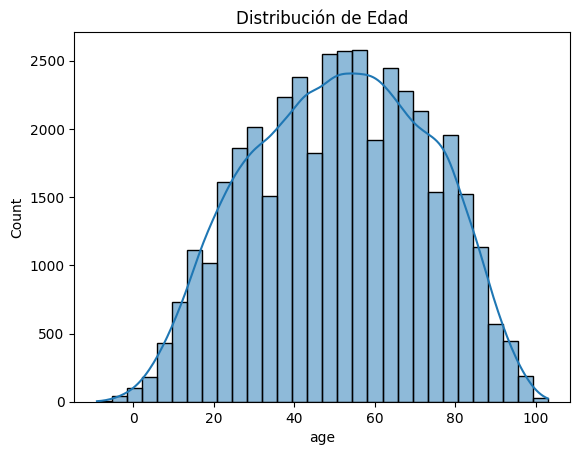

In [11]:
# Distribución de la edad
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribución de Edad')
plt.show()

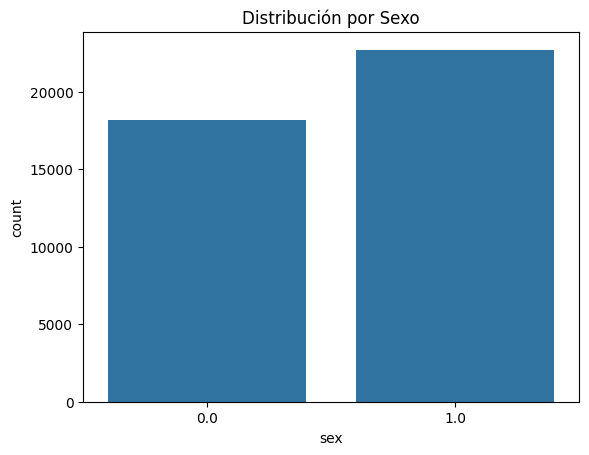

In [13]:

import seaborn as sns
import matplotlib.pyplot as plt

stroke_data = df

# Distribución por sexo
sns.countplot(data=stroke_data, x='sex')
plt.title('Distribución por Sexo')
plt.show()

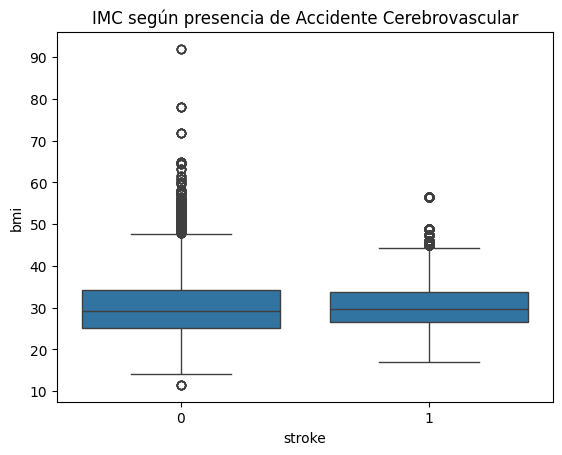

In [14]:
# Boxplot de IMC según presencia de accidente cerebrovascular
sns.boxplot(data=stroke_data, y='bmi', x='stroke')
plt.title('IMC según presencia de Accidente Cerebrovascular')
plt.show()


In [15]:
# Detección de duplicados
stroke_data.duplicated().sum()


0

In [16]:
# Detección de outliers
def detect_outliers(df, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > 1)
    return multiple_outliers

# Detectar outliers en columnas numéricas
outliers = detect_outliers(stroke_data, ['age', 'avg_glucose_level', 'bmi'])
print("Número de outliers detectados:", len(outliers))


Número de outliers detectados: 0


In [17]:
# Codificación de variables categóricas
stroke_data['sex'] = stroke_data['sex'].map({0: 'Female', 1: 'Male'})
stroke_data['ever_married'] = stroke_data['ever_married'].map({0: 'No', 1: 'Yes'})
stroke_data['stroke'] = stroke_data['stroke'].map({0: 'No Stroke', 1: 'Stroke'})

# Escalado de variables numéricas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
stroke_data[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(stroke_data[['age', 'avg_glucose_level', 'bmi']])
stroke_data.head()


,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,0.539812,0,1,Yes,4,1,1.852199,0.906167,1,Stroke
1,Male,-0.431344,0,1,Yes,4,0,-0.280675,0.306313,0,Stroke
2,Female,0.447321,0,0,Yes,4,1,0.853951,0.584294,1,Stroke
3,Male,-0.477590,1,0,Yes,3,0,0.904158,-0.937288,0,Stroke
4,Male,1.557214,0,0,Yes,4,1,1.114197,-0.205758,1,Stroke
